In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [45]:
data = pd.read_csv('../../raw_data/bitstampUSD.csv')

In [36]:
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s', origin='unix')

<AxesSubplot:xlabel='Timestamp', ylabel='Open'>

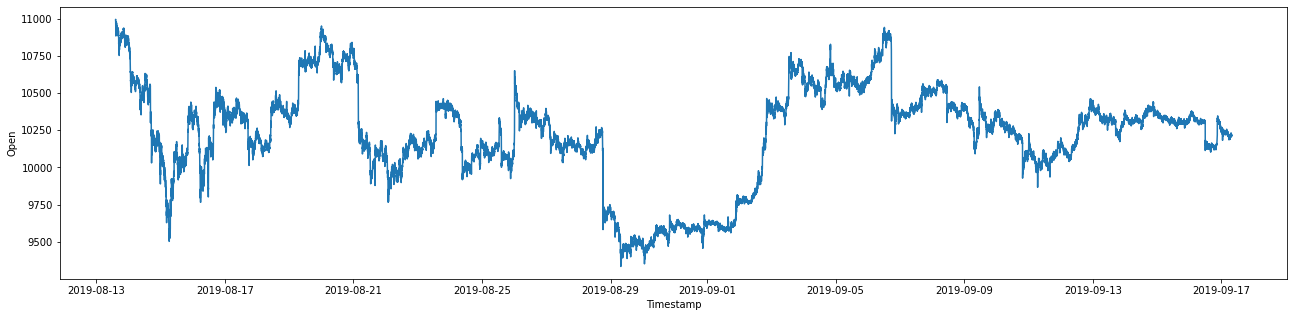

In [46]:
plt.figure(figsize=(22,5))
sns.lineplot(data=data[4000000:4050000], x='Timestamp', y='Open')

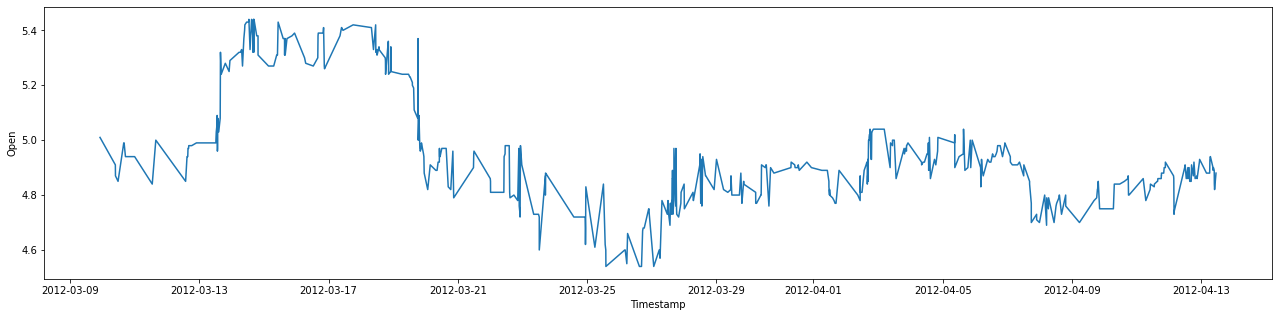

In [23]:
plt.figure(figsize=(22,5))
sns.lineplot(data=data[100000:150000], x='Timestamp', y='Open')

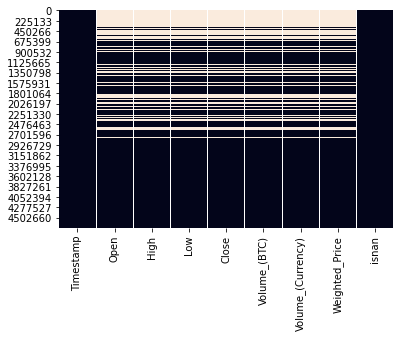

In [24]:
sns.heatmap(data.isnull(), cbar=False)

In [29]:
months = [data[data['Timestamp'] == f'2020-{i+1}-01 00:00:00'].index[0] for i in range(12)]
months

[4202176,
 4246816,
 4288576,
 4333216,
 4376416,
 4421056,
 4464256,
 4508896,
 4553536,
 4596736,
 4641376,
 4684576]

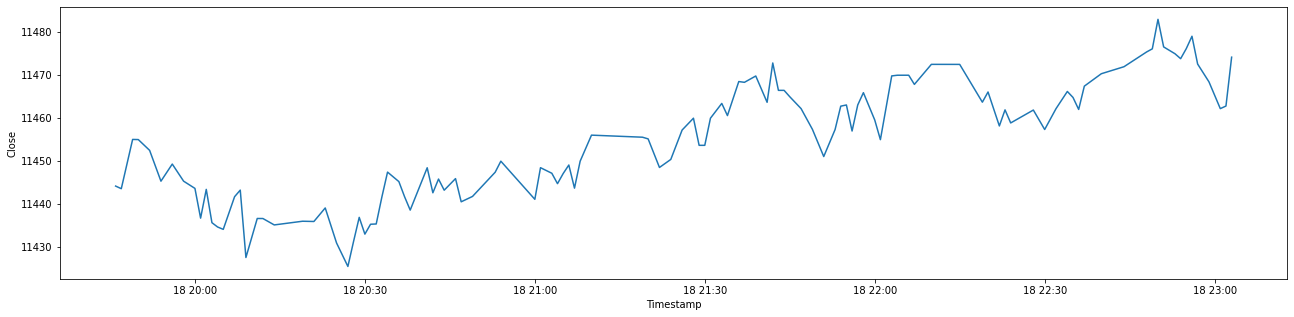

In [44]:
plt.figure(figsize=(22,5))
sns.lineplot(data=data[4622400:4622600], x='Timestamp', y='Close');

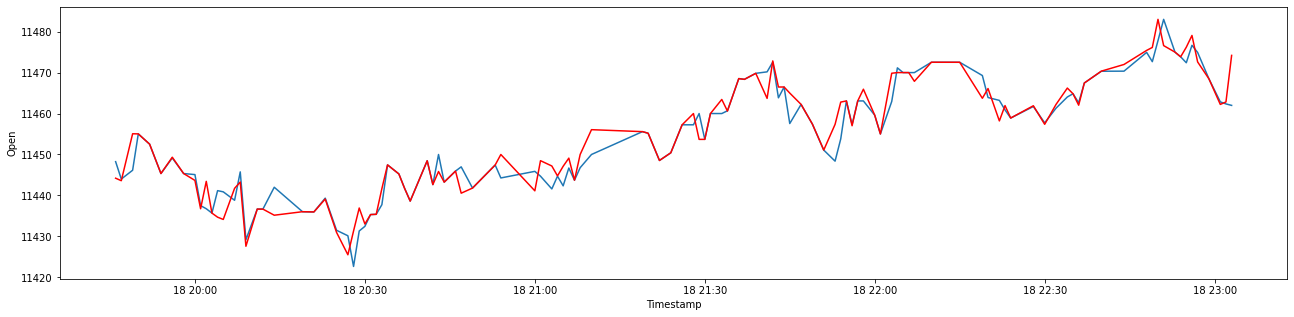

In [46]:
plt.figure(figsize=(22,5))
sns.lineplot(data=data[4622400:4622600], x='Timestamp', y='Open')
sns.lineplot(data=data[4622400:4622600], x='Timestamp', y='Close', color='red');

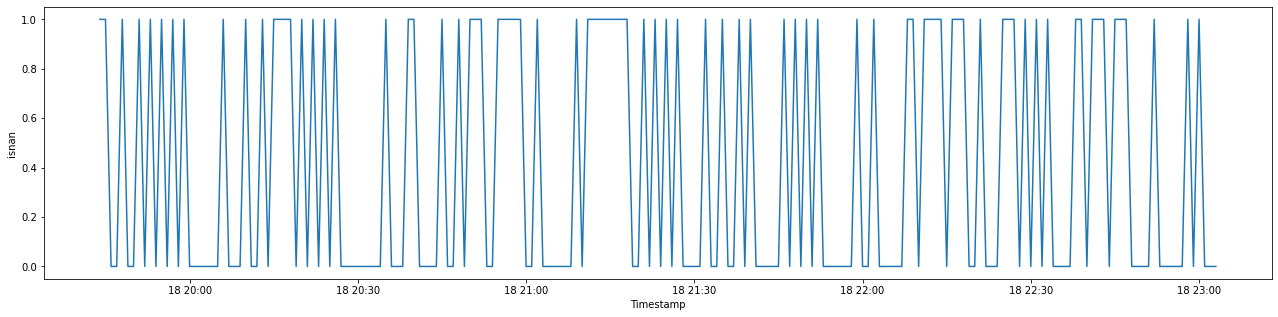

In [42]:
plt.figure(figsize=(22,5))
sns.lineplot(data=data[4622400:4622600], x='Timestamp', y='isnan', g);

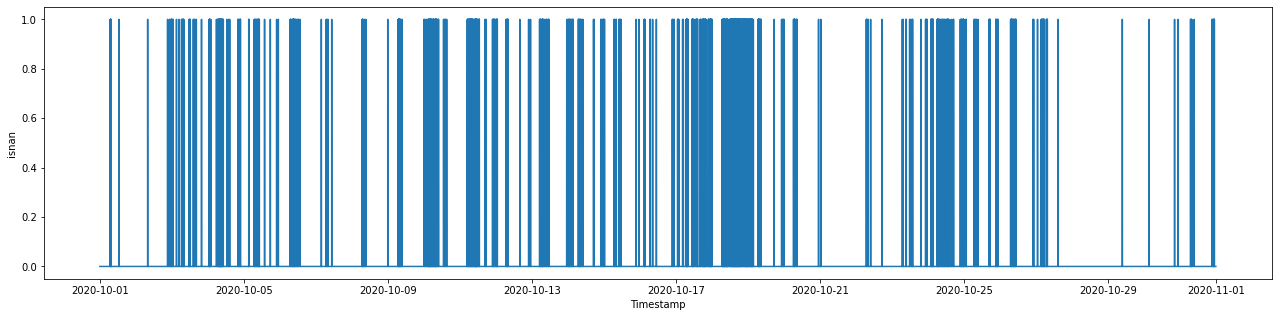

In [38]:
plt.figure(figsize=(22,5))
sns.lineplot(data=data[4596736:4641376], x='Timestamp', y='isnan');

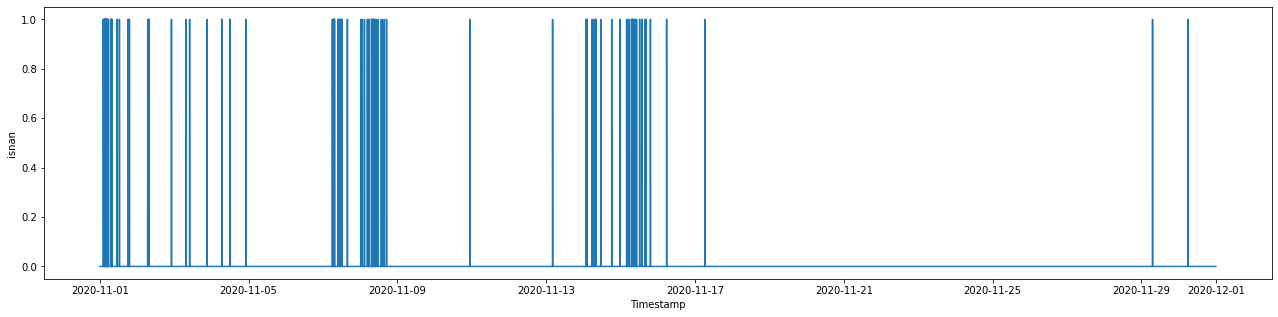

In [33]:
plt.figure(figsize=(22,5))
sns.lineplot(data=data[4641376:4684576], x='Timestamp', y='isnan');

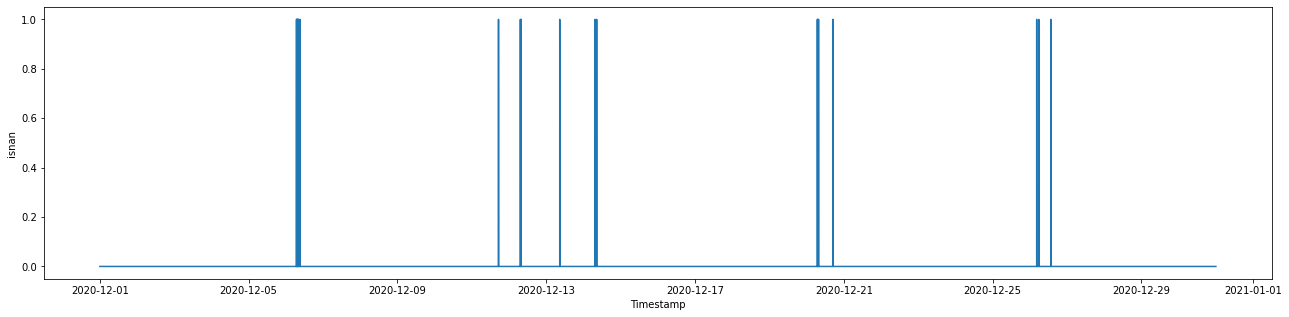

In [32]:
plt.figure(figsize=(22,5))
sns.lineplot(data=data[4684576:], x='Timestamp', y='isnan');

In [38]:
def monthna(X):
    months = list(np.arange(1,13,1))

    open_nan = []
    open_sum = []
    close_nan = []
    close_sum = []


    for x in months:
        open_sum.append(pd.DataFrame(X[X['Timestamp'].dt.month == x]['Open'].value_counts(dropna=False)).reset_index()['Open'].sum())
        open_nan.append(pd.DataFrame(X[X['Timestamp'].dt.month == x]['Open'].value_counts(dropna=False)).reset_index().iloc[0,1])
        close_sum.append(pd.DataFrame(X[X['Timestamp'].dt.month == x]['Close'].value_counts(dropna=False)).reset_index()['Close'].sum())
        close_nan.append(pd.DataFrame(X[X['Timestamp'].dt.month == x]['Close'].value_counts(dropna=False)).reset_index().iloc[0,1])
    M = pd.Series(months)
    ON = pd.Series(open_nan)
    OS = pd.Series(open_sum)
    CN = pd.Series(close_nan)
    CS = pd.Series(close_sum)
    return pd.DataFrame((pd.concat([ON, OS, CN, CS], axis=1).set_index(M))).rename(columns={0:'Count NA Open', 1:'Total Open', 2:'Count NA Close', 3:'Total Close'})
    

In [39]:
df_2017 = data[data['Timestamp'].dt.year == 2017]
df_month_17 = monthna(df_2017)
df_month_17['percent NA OP'] = round((df_month_17['Count NA Open']/df_month_17['Total Open'])*100, 2)
df_month_17['percent NA CL'] = round((df_month_17['Count NA Close']/df_month_17['Total Close'])*100, 2)
df_month_17 = df_month_17.drop(columns=['Count NA Open', 'Total Open', 'Count NA Close', 'Total Close'])

In [40]:
df_2018 = data[data['Timestamp'].dt.year == 2018]
df_month_18 = monthna(df_2018)
df_month_18['percent NA OP'] = round((df_month_18['Count NA Open']/df_month_18['Total Open'])*100, 2)
df_month_18['percent NA CL'] = round((df_month_18['Count NA Close']/df_month_18['Total Close'])*100, 2)
df_month_18 = df_month_18.drop(columns=['Count NA Open', 'Total Open', 'Count NA Close', 'Total Close'])

In [41]:
df_2019 = data[data['Timestamp'].dt.year == 2019]
df_month_19 = monthna(df_2019)
df_month_19['percent NA OP'] = round((df_month_19['Count NA Open']/df_month_19['Total Open'])*100, 2)
df_month_19['percent NA CL'] = round((df_month_19['Count NA Close']/df_month_19['Total Close'])*100, 2)
df_month_19 = df_month_19.drop(columns=['Count NA Open', 'Total Open', 'Count NA Close', 'Total Close'])

In [42]:
df_2020 = data[data['Timestamp'].dt.year == 2020]
df_month_20 = monthna(df_2020)
df_month_20['percent NA OP'] = round((df_month_20['Count NA Open']/df_month_20['Total Open'])*100, 2)
df_month_20['percent NA CL'] = round((df_month_20['Count NA Close']/df_month_20['Total Close'])*100, 2)
df_month_20 = df_month_20.drop(columns=['Count NA Open', 'Total Open', 'Count NA Close', 'Total Close'])

In [43]:
[df_month_17, df_month_18, df_month_19, df_month_20]
df_final = pd.concat([df_month_17, df_month_18, df_month_19, df_month_20], axis= 1)
df_final

,percent NA OP,percent NA CL,percent NA OP,percent NA CL,percent NA OP,percent NA CL,percent NA OP,percent NA CL
1,19.62,19.62,0.24,0.24,10.08,10.08,0.56,0.56
2,21.56,21.56,0.19,0.19,8.16,8.16,0.09,0.13
3,14.84,14.84,0.65,0.65,9.08,9.08,0.81,0.81
4,19.17,19.17,0.18,0.18,2.59,2.59,3.90,3.90
5,4.83,4.83,0.25,0.25,0.46,0.46,1.19,1.19
6,3.62,3.62,0.81,0.81,0.30,0.30,2.62,2.62
7,5.01,5.01,1.03,1.03,0.80,0.80,3.99,3.99
8,3.16,3.16,3.59,3.59,1.54,1.54,1.09,1.09
9,1.89,1.89,8.80,8.80,3.21,3.21,1.42,1.42
10,2.94,2.94,14.98,14.98,0.43,0.43,2.45,2.45


In [47]:
data = data.copy()

In [48]:
data = data[2756000:4727776]
data

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
2756000,2017-04-01 17:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2756001,2017-04-01 17:05:00,1072.15,1072.15,1071.09,1071.09,0.094330,101.073544,1071.488855
2756002,2017-04-01 17:06:00,1071.57,1071.97,1071.57,1071.97,0.113843,122.006378,1071.708462
2756003,2017-04-01 17:07:00,1070.77,1071.04,1070.77,1071.04,0.768544,822.946765,1070.786333
2756004,2017-04-01 17:08:00,1069.78,1069.78,1067.00,1067.00,27.301009,29141.464886,1067.413470
...,...,...,...,...,...,...,...,...
4727771,2020-12-30 23:55:00,28809.07,28825.50,28800.01,28810.08,0.087391,2517.799582,28810.597267
4727772,2020-12-30 23:56:00,28801.47,28829.42,28785.64,28829.42,0.965221,27804.572129,28806.429798
4727773,2020-12-30 23:57:00,28829.42,28863.90,28829.42,28857.06,2.368831,68332.350629,28846.441863
4727774,2020-12-30 23:58:00,28850.49,28900.52,28850.49,28882.82,2.466590,71232.784464,28879.056266


In [49]:
data = data.set_index('Timestamp')

In [50]:
data

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2017-04-01 17:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-01 17:05:00,1072.15,1072.15,1071.09,1071.09,0.094330,101.073544,1071.488855
2017-04-01 17:06:00,1071.57,1071.97,1071.57,1071.97,0.113843,122.006378,1071.708462
2017-04-01 17:07:00,1070.77,1071.04,1070.77,1071.04,0.768544,822.946765,1070.786333
2017-04-01 17:08:00,1069.78,1069.78,1067.00,1067.00,27.301009,29141.464886,1067.413470
...,...,...,...,...,...,...,...
2020-12-30 23:55:00,28809.07,28825.50,28800.01,28810.08,0.087391,2517.799582,28810.597267
2020-12-30 23:56:00,28801.47,28829.42,28785.64,28829.42,0.965221,27804.572129,28806.429798
2020-12-30 23:57:00,28829.42,28863.90,28829.42,28857.06,2.368831,68332.350629,28846.441863


<AxesSubplot:xlabel='Timestamp', ylabel='Open'>

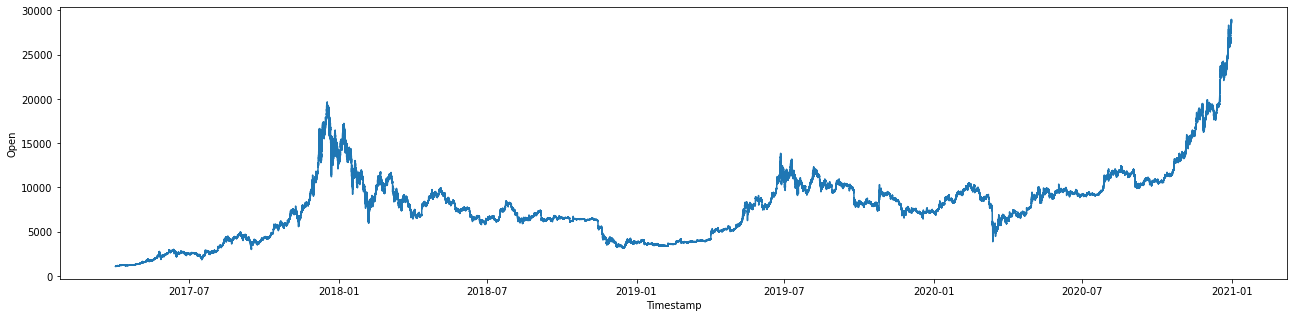

In [28]:
plt.figure(figsize=(22,5))
sns.lineplot(data=data, x='Timestamp', y='Open')

In [51]:
data_new = data.Open
data_new = pd.DataFrame(data_new)

In [52]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean") 

imputer.fit(data[['Open']]) 
data['Open'] = imputer.transform(data[['Open']]) 

imputer.statistics_ 

array([7977.48828058])

In [53]:
# let's keep the last 40% values out for test purposes
train_size = 0.6
index = round(train_size*data_new.shape[0])
data_train = data_new.iloc[:index]
data_test = data_new.iloc[index+1:]


In [54]:
y_pred = data_new.shift(1)
y_pred

,Open
Timestamp,
2017-04-01 17:04:00,NaN
2017-04-01 17:05:00,NaN
2017-04-01 17:06:00,1072.15
2017-04-01 17:07:00,1071.57
2017-04-01 17:08:00,1070.77
...,...
2020-12-30 23:55:00,28800.00
2020-12-30 23:56:00,28809.07
2020-12-30 23:57:00,28801.47


In [55]:
# Example of feature dataset X
data2 = data_new.copy()
data2_train = data_train.copy()
data2_test = data_test.copy()

for i in range(1, 100):
    data2_train[f't - {i}'] = data_train['Open'].shift(i)
    data2_test[f't - {i}'] = data_test['Open'].shift(i)

data2_train.dropna(inplace=True)    
data2_test.dropna(inplace=True)    
data2_train.head()

,Open,t - 1,t - 2,t - 3,t - 4,t - 5,t - 6,t - 7,t - 8,t - 9,...,t - 90,t - 91,t - 92,t - 93,t - 94,t - 95,t - 96,t - 97,t - 98,t - 99
Timestamp,,,,,,,,,,,,,,,,,,,,,
2017-04-02 18:15:00,1084.65,1081.26,1081.34,1081.33,1082.29,1082.36,1082.42,1082.50,1083.17,1083.70,...,1081.82,1081.85,1081.67,1081.33,1082.90,1082.78,1082.13,1084.47,1084.49,1085.09
2017-04-02 18:16:00,1082.92,1084.65,1081.26,1081.34,1081.33,1082.29,1082.36,1082.42,1082.50,1083.17,...,1082.57,1081.82,1081.85,1081.67,1081.33,1082.90,1082.78,1082.13,1084.47,1084.49
2017-04-02 18:17:00,1085.24,1082.92,1084.65,1081.26,1081.34,1081.33,1082.29,1082.36,1082.42,1082.50,...,1081.01,1082.57,1081.82,1081.85,1081.67,1081.33,1082.90,1082.78,1082.13,1084.47
2017-04-02 18:18:00,1087.96,1085.24,1082.92,1084.65,1081.26,1081.34,1081.33,1082.29,1082.36,1082.42,...,1081.01,1081.01,1082.57,1081.82,1081.85,1081.67,1081.33,1082.90,1082.78,1082.13
2017-04-02 18:19:00,1087.01,1087.96,1085.24,1082.92,1084.65,1081.26,1081.34,1081.33,1082.29,1082.36,...,1081.19,1081.01,1081.01,1082.57,1081.82,1081.85,1081.67,1081.33,1082.90,1082.78


In [59]:
# Train Test Split
X_train = data2_train.drop(columns = ['Open'])
y_train = data2_train['Open']
X_test = data2_test.drop(columns = ['Open'])
y_test = data2_test['Open']

print(X_train.shape,y_train.shape, X_test.shape,y_test.shape)

(540111, 99) (540111,) (483141, 99) (483141,)


In [65]:
#Baseline (simplest model)

from sklearn.metrics import r2_score

y_pred = data2_test.shift(1).dropna()
y_true = data2_test[1:]
print(f"R2:{r2_score(y_true, y_pred)}")

R2:0.9999886024316545


R2:  0.999989835421807


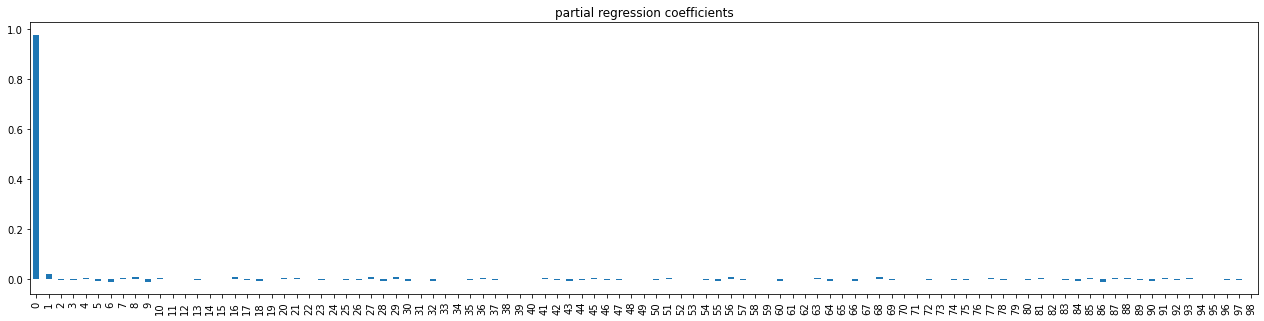

In [69]:
# Predict and measure R2

from sklearn.linear_model import LinearRegression


model = LinearRegression()
model = model.fit(X_train, y_train)

print('R2: ', r2_score(y2_test, model.predict(X_test)))

plt.figure(figsize=(22,5))
pd.Series(model.coef_).plot(kind='bar')
plt.title('partial regression coefficients');

In [64]:
# Baseline model : logistic regression

# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import cross_val_score

# log_reg = LogisticRegression(max_iter=1000)

# log_reg = log_reg.fit(X_train, y_train)

# score = log_reg.predict(y_pred)

ValueError: Unknown label type: 'continuous'

In [ ]:
from ipywidgets import interact
#@interact(max_depth=10)
def plot_classifier(max_depth):
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_moon, y_moon)
    plot_decision_regions(X_moon, y_moon, classifier=clf)

plot_classifier(max_depth=10)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=2)
tree_clf.fit(X,y)